In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df = pd.read_csv('/content/drive/MyDrive/AML/laptop_price.csv', encoding='latin-1')
#10 random items
df.sample(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1166,1184,Lenovo,ThinkPad T570,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,1390.00
720,728,Lenovo,ThinkPad X1,Ultrabook,14.0,IPS Panel Quad HD+ 2560x1440,Intel Core i7 6500U 2.5GHz,8GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.17kg,1686.64
1055,1069,HP,ProBook 650,Notebook,15.6,1366x768,Intel Core i3 6100U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.31kg,705.15
212,217,HP,15-bs018nq (i3-6006U/4GB/500GB/FHD/No,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,2.1kg,349.00
1048,1062,Lenovo,IdeaPad Y900-17ISK,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,4.6kg,2289.99
1132,1147,Asus,L403NA-GA013TS (N3350/4GB/32GB/W10),Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5kg,278.00
330,336,MSI,GL72M 7REX,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.7kg,1199.00
1025,1039,HP,Elitebook 820,Ultrabook,12.5,1366x768,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.26kg,1559.00
450,457,HP,15-bs024nv (i5-7200U/8GB/128GB/W10),Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8GB,128GB SSD,Intel HD Graphics 620,Windows 10,1.91kg,589.00
354,360,Toshiba,Tecra A50-C-21G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Nvidia GeForce 930M,Windows 10,2.4kg,1403.00


In [4]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


# Feature engineering

In [6]:
#Converting Ram and Weight data type.
df['Ram'] = df['Ram'].str.replace('GB','')
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].str.replace('kg','')
df['Weight'] = df['Weight'].astype('float32')

In [7]:
#ScreenResolution information.
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [8]:
#Splitting ScreenResolution info (IPS, Touchscreen and resolution)
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df['X_res'] = df['ScreenResolution'].str.split('x',n=1,expand=True)[0]
df['Y_res'] = df['ScreenResolution'].str.split('x',n=1,expand=True)[1]
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [9]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
#Defining ppi instead of all the X_res, Y_res and Inches.
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.drop(columns = ['X_res', 'Y_res', 'Inches', 'ScreenResolution'], inplace = True)

In [10]:
#CPU
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [11]:
#Cpu is either Intel core i3, i5, i7 or AMD
df['Cpu'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
def processor(x):
    if x == 'Intel Core i3' or x == 'Intel Core i5' or x == 'Intel Core i7':
        return x
    else:
        if x.split()[0] == 'Intel':
            return 'Other Intel'
        else:
            return 'AMD'
df['Cpu'] = df['Cpu'].apply(processor)

In [12]:
#Memory
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [13]:
#Extracting HDD, SSD, Hybrid and Flash storage
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')
df['Memory1'] = df['Memory'].str.split("+", n = 1, expand = True)[0].str.strip()
df['Memory2'] = df['Memory'].str.split("+", n = 1, expand = True)[1]
df['1HDD'] = df['Memory1'].apply(lambda x: 1 if "HDD" in x else 0)
df['1SSD'] = df['Memory1'].apply(lambda x: 1 if "SSD" in x else 0)
df['1Hybrid'] = df['Memory1'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['1Flash'] = df['Memory1'].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['Memory1'] = df['Memory1'].str.replace(r'\D', '')
df['Memory2'].fillna("0", inplace = True)

df['2HDD'] = df['Memory2'].apply(lambda x: 1 if "HDD" in x else 0)
df['2SSD'] = df['Memory2'].apply(lambda x: 1 if "SSD" in x else 0)
df['2Hybrid'] = df['Memory2'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['2Flash'] = df['Memory2'].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['Memory2'] = df['Memory2'].str.replace(r'\D', '')
df['Memory1'] = df['Memory1'].astype(int)
df['Memory2'] = df['Memory2'].astype(int)

df['HDD']=(df['Memory1']*df['1HDD']+df['Memory2']*df['2HDD'])
df['SSD']=(df['Memory1']*df['1SSD']+df['Memory2']*df['2SSD'])
df['Hybrid']=(df['Memory1']*df['1Hybrid']+df['Memory2']*df['2Hybrid'])
df['Flash_Storage']=(df['Memory1']*df['1Flash']+df['Memory2']*df['2Flash'])

df.drop(columns=['Memory1', 'Memory2', '1HDD', '1SSD', '1Hybrid', '1Flash', 
                 '2HDD', '2SSD', '2Hybrid', '2Flash', 'Memory'],inplace=True)

<ipython-input-13-053ea062d0d9>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Memory1'] = df['Memory1'].str.replace(r'\D', '')
<ipython-input-13-053ea062d0d9>:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Memory2'] = df['Memory2'].str.replace(r'\D', '')


In [14]:
#GPU
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [15]:
df['Gpu'] = df['Gpu'].apply(lambda x:x.split()[0])

In [16]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [17]:
#Droping irrelevant features.
df.drop(columns=['laptop_ID', 'Product'],inplace=True)

<ipython-input-20-00afe5588d63>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

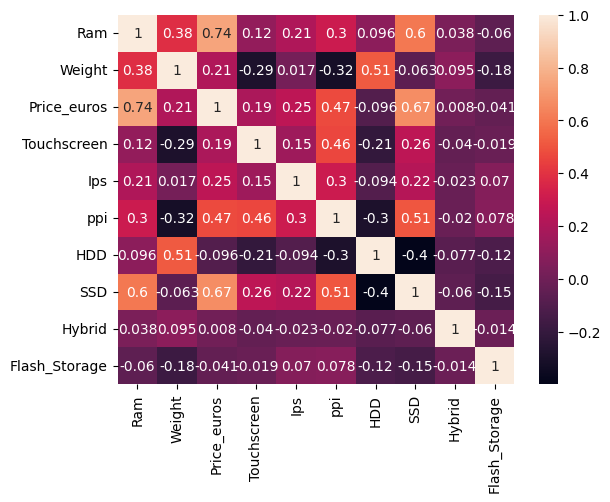

In [20]:
#Correlation between features.
sns.heatmap(df.corr(), annot = True)

In [21]:
df.corr()['Price_euros']

<ipython-input-21-0768d9e91908>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price_euros']


Ram              0.743007
Weight           0.210370
Price_euros      1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price_euros, dtype: float64

In [22]:
#Neglecting some features based on correlation
df.drop(columns=['Hybrid', 'Flash_Storage'],inplace=True)

# Visulization

In [23]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,HDD,SSD
0,Apple,Ultrabook,Intel Core i5,8,Intel,macOS,1.37,1339.69,0,1,226.983005,0,128
1,Apple,Ultrabook,Intel Core i5,8,Intel,macOS,1.34,898.94,0,0,127.677940,0,0
2,HP,Notebook,Intel Core i5,8,Intel,No OS,1.86,575.00,0,0,141.211998,0,256
3,Apple,Ultrabook,Intel Core i7,16,AMD,macOS,1.83,2537.45,0,1,220.534624,0,512
4,Apple,Ultrabook,Intel Core i5,8,Intel,macOS,1.37,1803.60,0,1,226.983005,0,256


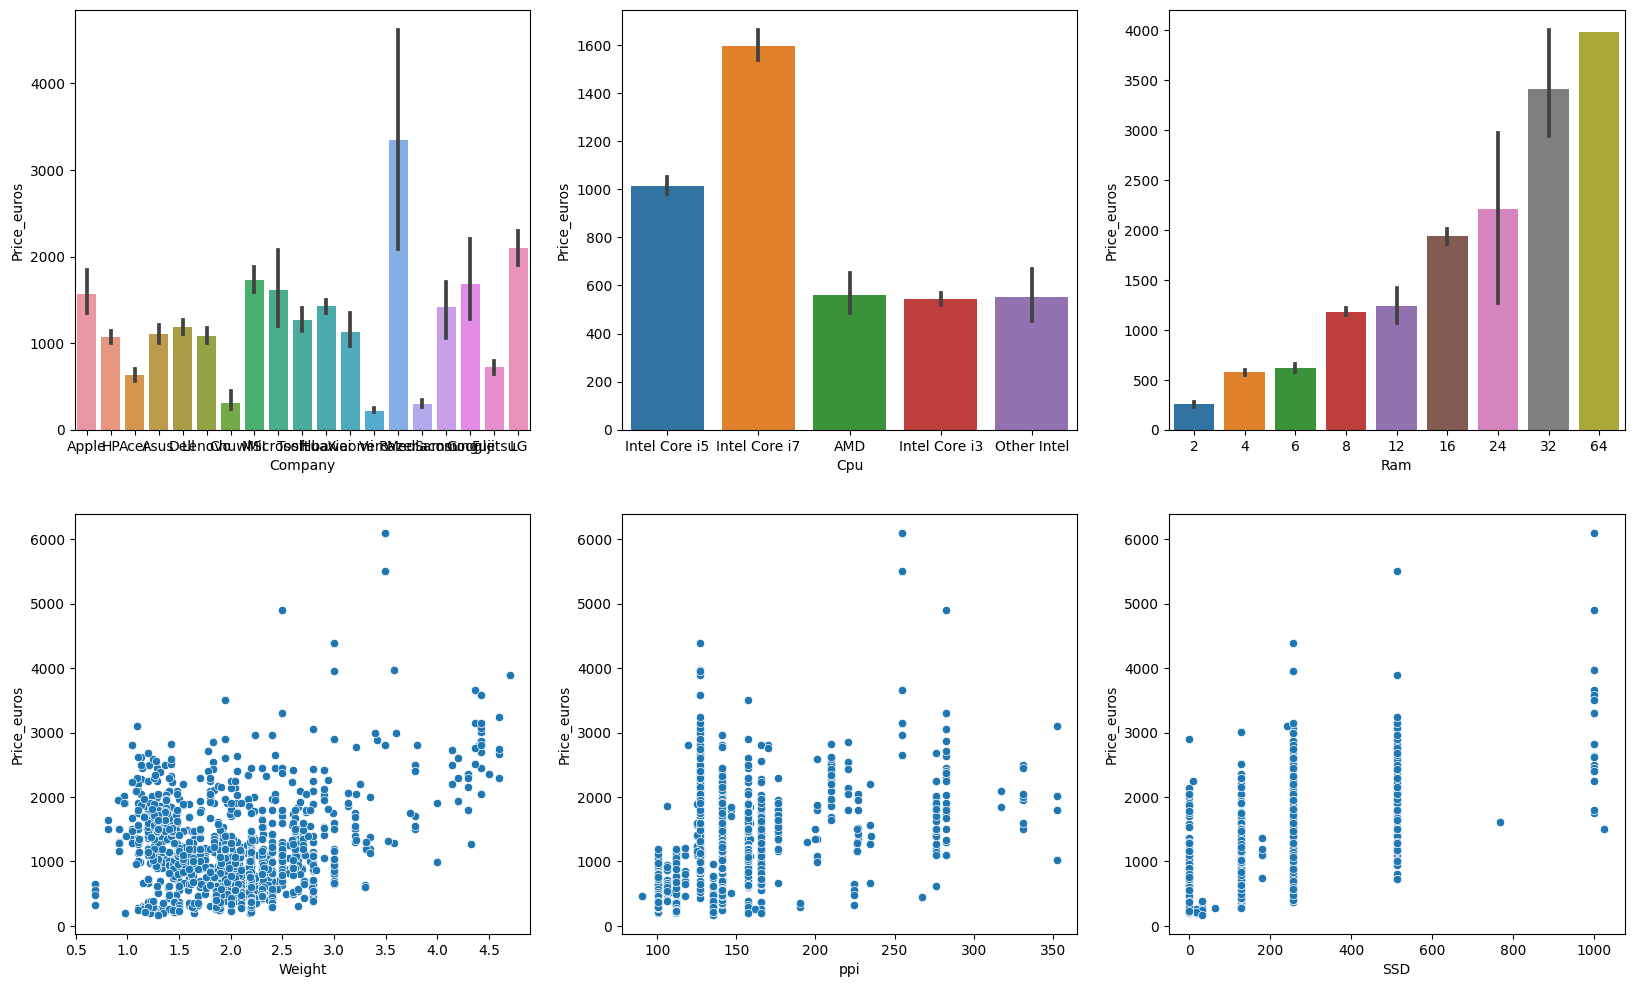

In [25]:
fig, axes = plt.subplots(2,3, figsize = (20,12))
# Company
sns.barplot(x = df['Company'], y = df['Price_euros'], ax = axes[0,0])

#CPU
sns.barplot(x=df['Cpu'],y=df['Price_euros'], ax = axes[0,1])

#RAM
sns.barplot(x=df['Ram'],y=df['Price_euros'], ax = axes[0,2])

#Weight
sns.scatterplot(x=df['Weight'],y=df['Price_euros'], ax = axes[1,0])

#PPI
sns.scatterplot(x=df['ppi'],y=df['Price_euros'], ax = axes[1,1])

#SSD
sns.scatterplot(x=df['SSD'],y=df['Price_euros'], ax = axes[1,2])

plt.show()

In [26]:
X = df.drop(columns=['Price_euros', 'Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys'])
y = df['Price_euros']

In [27]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                     random_state=1)



In [31]:
#K-Fold for best degree
maxdeg = 12
k = 5
best_degree = []

for i in range(k):
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                   test_size=0.25, random_state=1)
    training_error = []
    validation_error = []
    
    # Looping through the degrees of polynomial
    for degree in range(1, maxdeg + 1 ):

        X_poly = PolynomialFeatures(degree).fit_transform(X)
        lreg = LinearRegression(fit_intercept=False) 
        mse_score = cross_validate(lreg, X_poly, y,cv=10, scoring="neg_mean_squared_error", return_train_score=True)
        validation_error.append(-1*(np.mean(mse_score['test_score'])))
        training_error.append(-1*(np.mean(mse_score['train_score'])))
    
    min_val_mse = min(validation_error)
    best_val_degree = validation_error.index(min_val_mse)
    best_degree.append(best_val_degree + 1)

In [32]:
min_val_mse, best_val_degree

(165020.79007350918, 1)

In [33]:
maxdeg = 12
training_error = []
validation_error = []
    
    # Looping through the degrees of polynomial
for degree in range(1, maxdeg + 1 ):

  X_poly = PolynomialFeatures(degree).fit_transform(X)
  lreg = LinearRegression(fit_intercept=False) 
  mse_score = cross_validate(lreg, X_poly, y,cv=10, scoring="neg_mean_squared_error", return_train_score=True)
  validation_error.append(-1*(np.mean(mse_score['test_score'])))
  training_error.append(-1*(np.mean(mse_score['train_score'])))

Text(0.5, 1.0, 'MSE VS Degree')

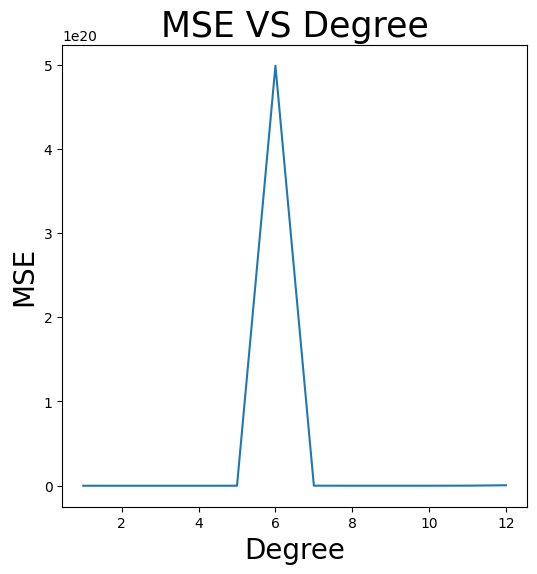

In [35]:
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(range(1,maxdeg+1),validation_error)
ax.set_xlabel('Degree',fontsize=20)
ax.set_ylabel('MSE',fontsize=20)
ax.set_title('MSE VS Degree',fontsize=25)

In [36]:
best_deg = 1
X_poly_train = PolynomialFeatures(best_deg).fit_transform(X_train)
X_poly_test  = PolynomialFeatures(best_deg).fit_transform(X_test)
lreg = LinearRegression() 
lreg.fit(X_poly_train, y_train)

# Predicting on test data
y_test_pred = lreg.predict(X_poly_test)
mse = mean_squared_error(y_test, y_test_pred)
r_2 = r2_score(y_test, y_test_pred)
print(f"The Mean Square Error of the predictions on test data is {mse:.4f} and ",
      f"The R2 Score of the predictions on test data is {r_2:.4f} ")

The Mean Square Error of the predictions on test data is 166983.9200 and  The R2 Score of the predictions on test data is 0.6604 
